# **Importing preprocessing libraries and loading the data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
df_red= pd.read_csv('/content/winequality-red.csv',sep=';')
df_white= pd.read_csv('/content/winequality-white.csv',sep=';')

In [3]:
print(df_red.head())
print(df_white.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [4]:
print(df_red.info())
print(df_white.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column   

In [5]:
red_white_dataset = pd.concat([df_red, df_white], axis=0, ignore_index=True) #this is the combined dataset
red_white_dataset.columns = red_white_dataset.columns.str.replace('&quot;', '')

In [6]:
print(red_white_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB
None


In [7]:
red_white_dataset.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [8]:
print(red_white_dataset['quality'].max())
print(red_white_dataset['quality'].min())

9
3


In [9]:
red_white_dataset['quality'] = red_white_dataset['quality'].apply(lambda x: 1 if x >=6 else 0)

Good=1, Bad=0


In [10]:
red_white_dataset.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        0  
1      9.8        0  
2      9.8        0  
3      9.8        1  
4      9.4        0

In [11]:
red_white_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

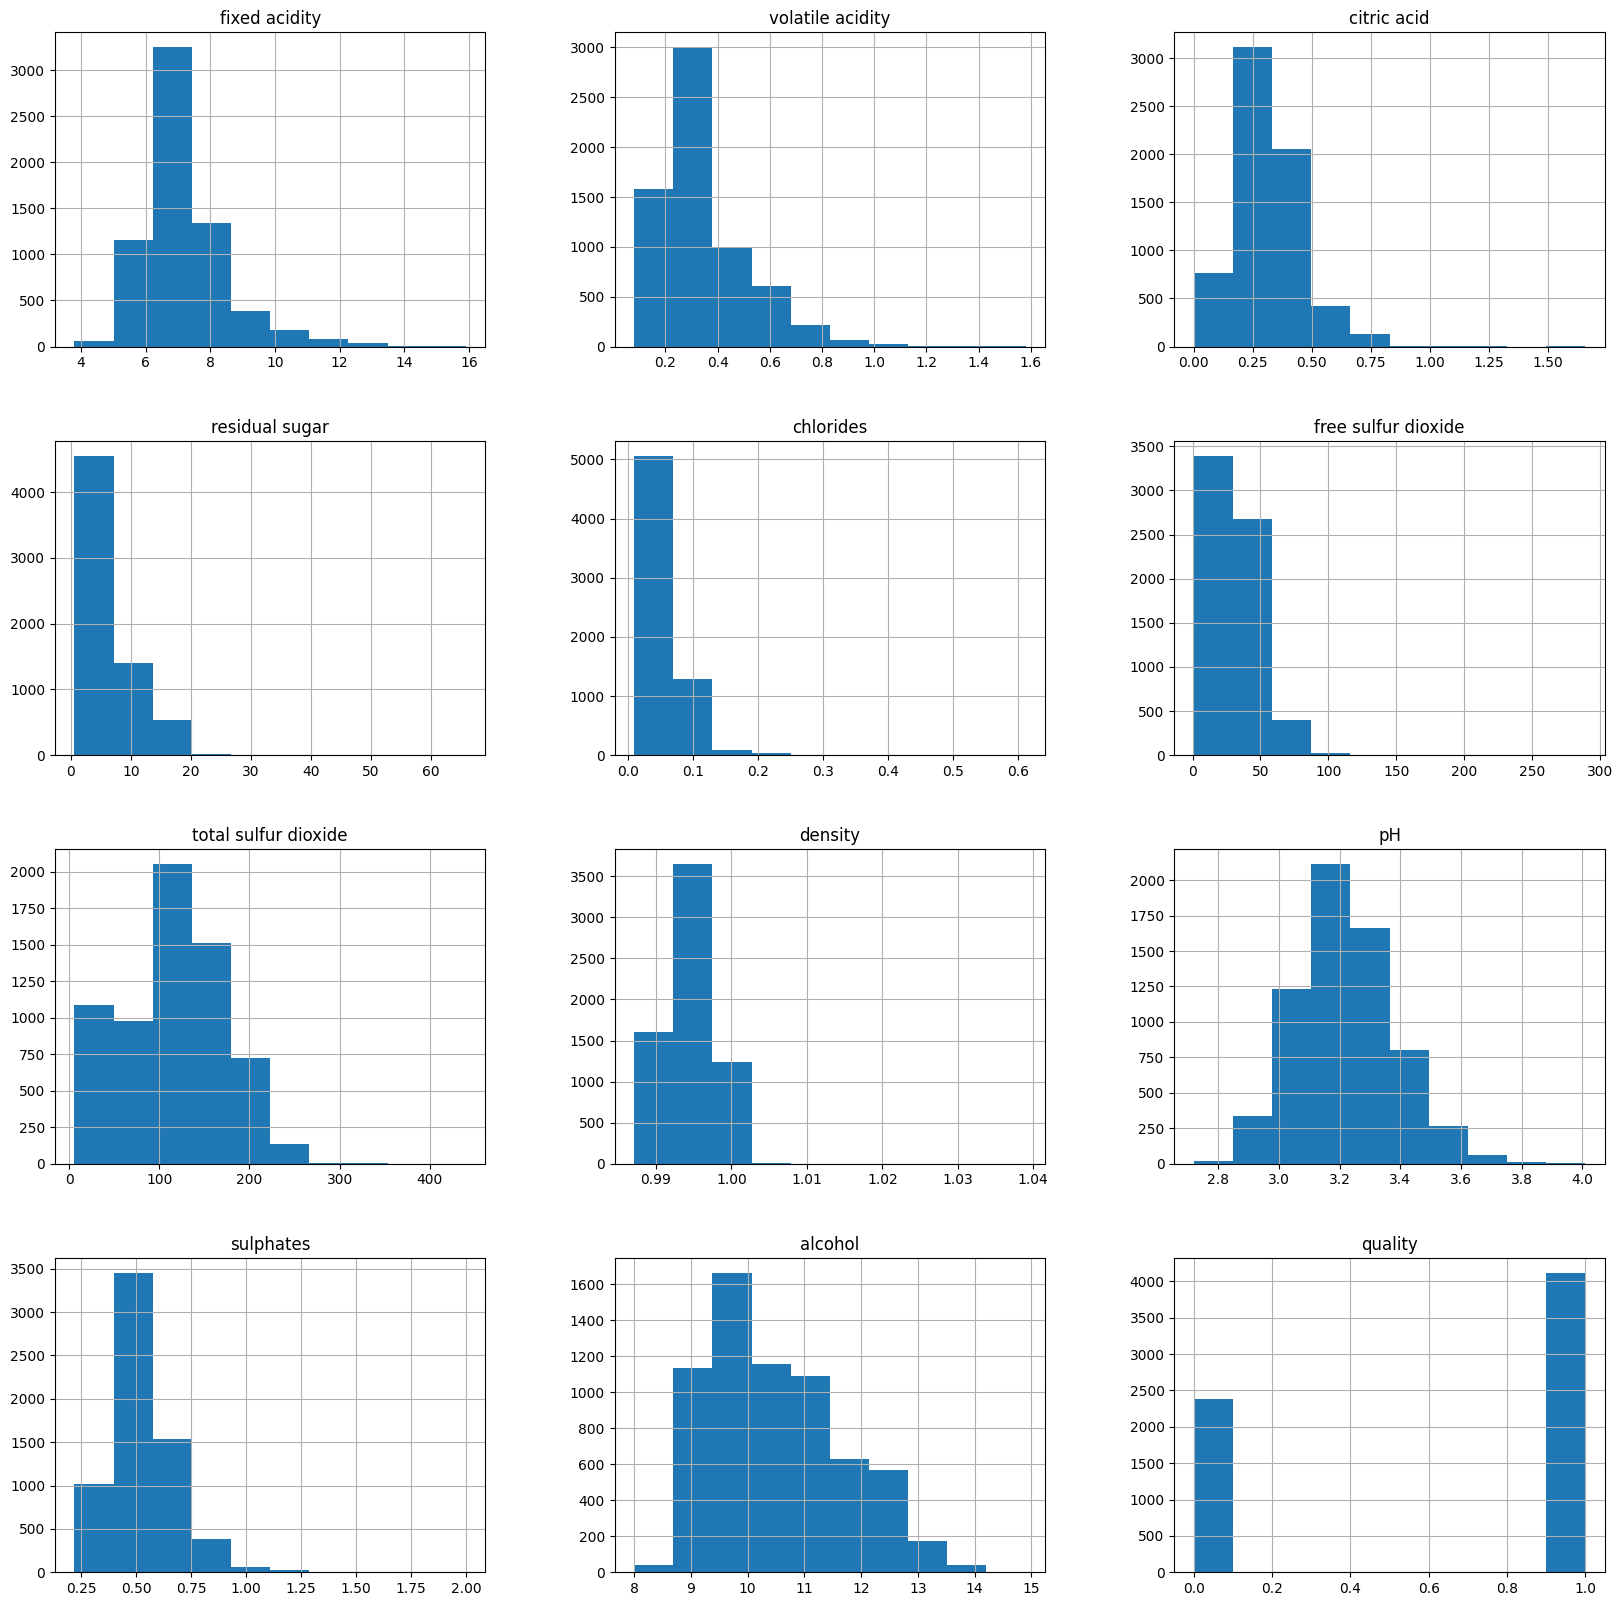

In [12]:
red_white_dataset.hist(figsize=(20,20))

In [13]:
red_white_dataset['quality'].value_counts()

1    4113
0    2384
Name: quality, dtype: int64

1    4113
0    2384
Name: quality, dtype: int64


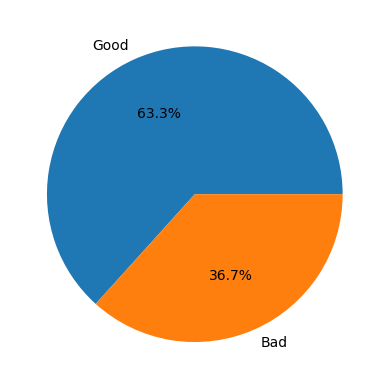

In [14]:
pct_labels = ['Good','Bad']
print(red_white_dataset['quality'].value_counts())
pct_value = (red_white_dataset['quality'].value_counts().values)
plt.pie(pct_value,labels=pct_labels,autopct='%1.1f%%')
plt.show()

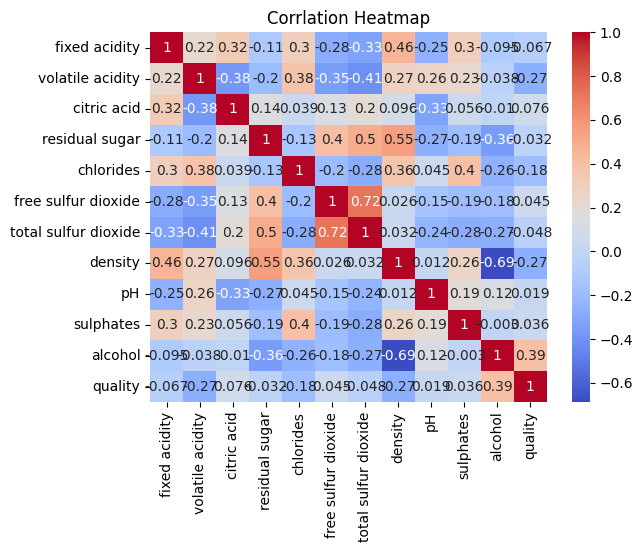

In [16]:
correlation_matrix=red_white_dataset.corr()
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm")
plt.title("Corrlation Heatmap")
plt.show()

In [18]:
X=red_white_dataset.iloc[:, :-1]
y=red_white_dataset.iloc[:,-1]

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
dtypes: float64(11)
memory usage: 558.5 KB


In [20]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 6497 entries, 0 to 6496
Series name: quality
Non-Null Count  Dtype
--------------  -----
6497 non-null   int64
dtypes: int64(1)
memory usage: 50.9 KB


# **Splitting The Dataset**

In [21]:
# splitting data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, Y_train, Y_test = train_test_split(X, y,
                                                    test_size = 0.20,
                                                    random_state = 10)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score,precision_score,recall_score

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [24]:
prediction = RandomForestClassifier(n_estimators=100)
prediction.fit(X_train, Y_train)
model = prediction.predict(X_test)
model_predictions = model

In [25]:
print(prediction.classes_)

[0 1]


In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5197 entries, 2705 to 1289
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5197 non-null   float64
 1   volatile acidity      5197 non-null   float64
 2   citric acid           5197 non-null   float64
 3   residual sugar        5197 non-null   float64
 4   chlorides             5197 non-null   float64
 5   free sulfur dioxide   5197 non-null   float64
 6   total sulfur dioxide  5197 non-null   float64
 7   density               5197 non-null   float64
 8   pH                    5197 non-null   float64
 9   sulphates             5197 non-null   float64
 10  alcohol               5197 non-null   float64
dtypes: float64(11)
memory usage: 487.2 KB


In [27]:
print(classification_report(Y_test, model_predictions))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76       473
           1       0.85      0.89      0.87       827

    accuracy                           0.83      1300
   macro avg       0.83      0.81      0.82      1300
weighted avg       0.83      0.83      0.83      1300



In [28]:
accuracy = accuracy_score(Y_test, model_predictions) * 100
f1 = f1_score(Y_test, model_predictions) * 100
precision = precision_score(Y_test, model_predictions) * 100
recall = recall_score(Y_test, model_predictions) * 100
print("Accuracy score = %.2f" %accuracy,"%")
print("f1 score = %.2f" %f1,"%")
print("precision score = %.2f" %precision,"%")
print("recall score = %.2f" %recall,"%")

Accuracy score = 83.46 %
f1 score = 87.29 %
precision score = 85.42 %
recall score = 89.24 %


Text(70.72222222222221, 0.5, 'Predicted')

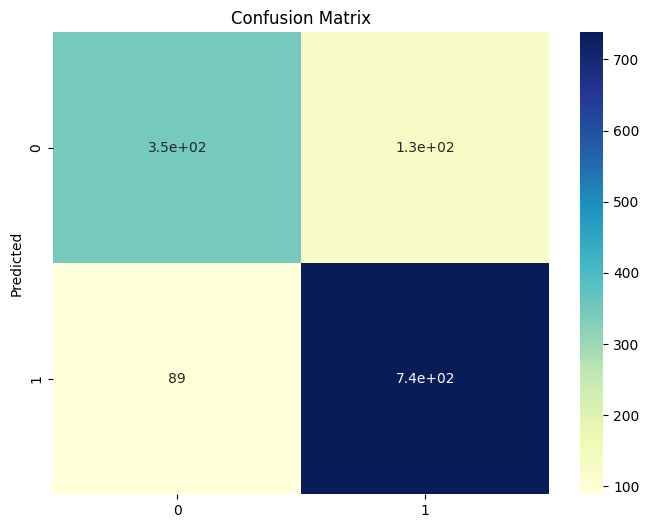

In [29]:
cm=confusion_matrix(Y_test, model_predictions)
plt.rcParams["figure.figsize"] = [8, 6]
sns.heatmap(cm,annot=True,cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.ylabel('Predicted')

# **SHAP Values**

In [30]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 5.4 MB/s eta 0:00:00


In [31]:
import shap

In [32]:
explainer_shap = shap.Explainer(prediction)
shap_plots = explainer_shap.shap_values(X_test)

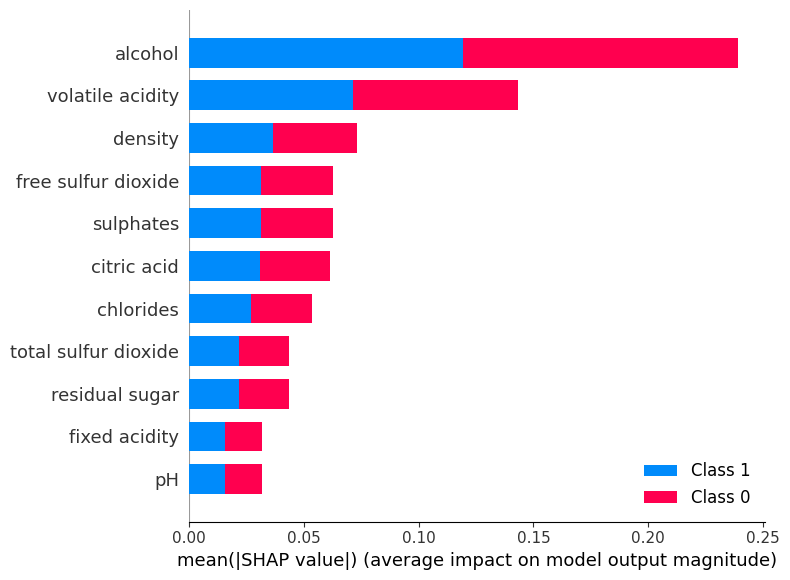

In [33]:
shap.summary_plot(shap_plots, X_test)

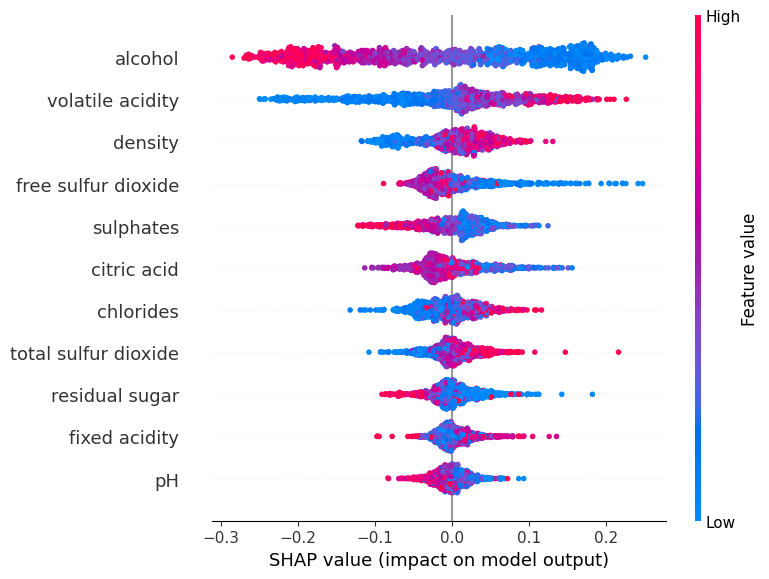

In [34]:
shap.summary_plot(shap_plots[0], X_test)

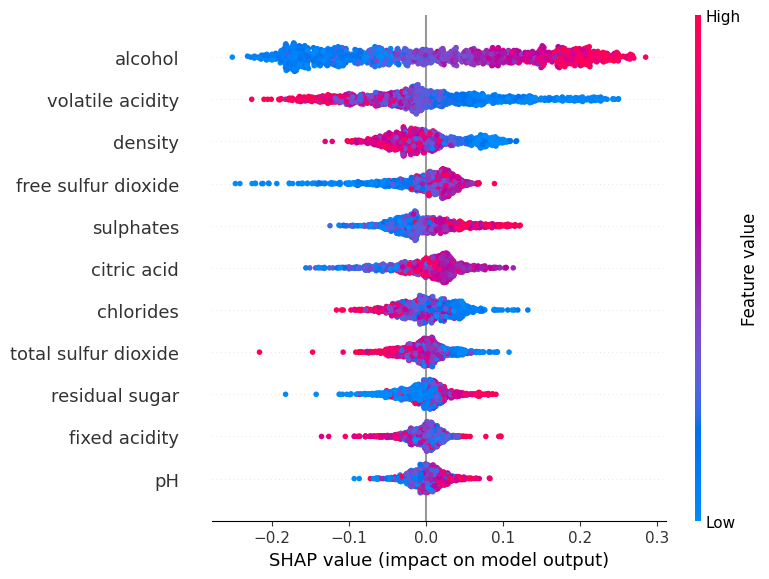

In [35]:
shap.summary_plot(shap_plots[1], X_test)

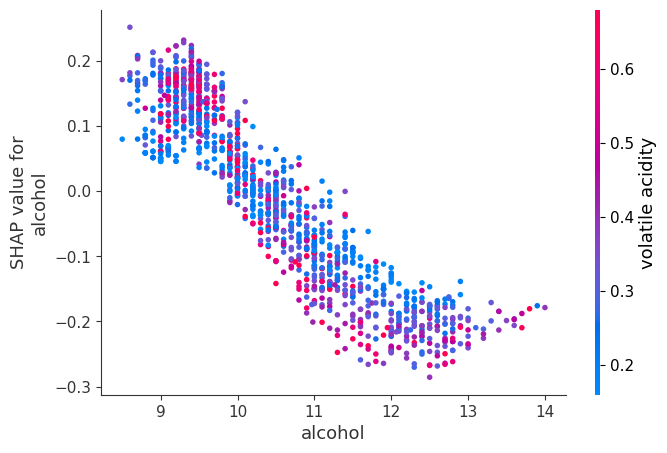

In [36]:
shap.dependence_plot("alcohol", shap_plots[0], X_test)

In [37]:
X_test.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
5746            6.8              0.18         0.35            5.40      0.054   
2529            7.7              0.17         0.52            5.90      0.017   
5029            7.1              0.17         0.40           14.55      0.047   
5142            6.0              0.33         0.20            1.80      0.031   
1551            7.1              0.67         0.00            2.30      0.083   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
5746                 53.0                 143.0  0.99287  3.10       0.54   
2529                 21.0                  84.0  0.99290  3.14       0.40   
5029                 47.0                 156.0  0.99945  3.34       0.78   
5142                 49.0                 159.0  0.99190  3.41       0.53   
1551                 18.0                  27.0  0.99768  3.44       0.54   

      alcohol  
5746     11.0  
2529     11.9  
5029      9.1  
5142     11.0  
1551      9.4

In [38]:
Y_test.head()

5746    1
2529    1
5029    1
5142    1
1551    0
Name: quality, dtype: int64

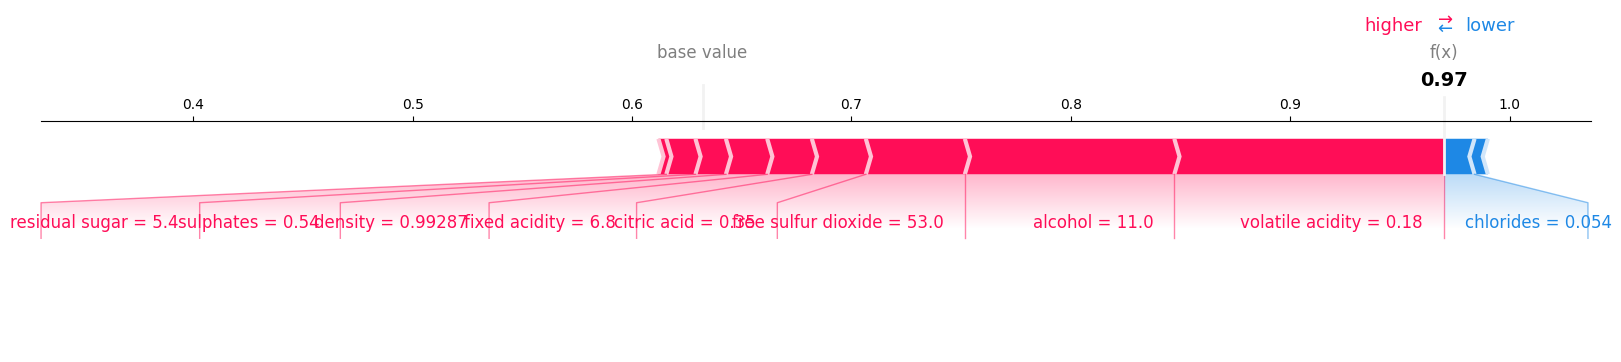

In [39]:
shap.force_plot(explainer_shap.expected_value[1], shap_plots[1][0, :], X_test.iloc[0, :], matplotlib=True)

# **LIME**

In [40]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=59f8c52a21f27a89f0420c05d2d6c63c01c0e45572da19ab250177b72e7bf044
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [41]:
import lime
import lime.lime_tabular
from lime.lime_tabular import LimeTabularExplainer

In [42]:
class_names=['Bad', 'Good']
lime_explainer =LimeTabularExplainer(training_data=np.array(X_train),feature_names = X_train.columns,class_names=class_names, mode = 'classification')

In [43]:
def predict_fn_rf(X):
    return prediction.predict_proba(X)

In [44]:
explanation=lime_explainer.explain_instance(X_test.iloc[0, :], predict_fn_rf ,num_features=10)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [45]:
print(explanation.as_list())

[('volatile acidity <= 0.23', 0.13354191327116227), ('10.30 < alcohol <= 11.30', 0.049647493935530695), ('free sulfur dioxide > 42.00', 0.029776651935258174), ('pH <= 3.11', -0.024144884247196886), ('6.40 < fixed acidity <= 7.00', 0.016602002481338588), ('119.00 < total sulfur dioxide <= 156.00', 0.01529287948666012), ('0.51 < sulphates <= 0.60', 0.00981423197979507), ('0.31 < citric acid <= 0.39', 0.008402153850505968), ('3.10 < residual sugar <= 8.10', 0.0073889461518282), ('0.99 < density <= 0.99', -0.004102265506016584)]


In [46]:
explanation.show_in_notebook()

In [47]:
X_test.head(2)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
5746            6.8              0.18         0.35             5.4      0.054   
2529            7.7              0.17         0.52             5.9      0.017   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
5746                 53.0                 143.0  0.99287  3.10       0.54   
2529                 21.0                  84.0  0.99290  3.14       0.40   

      alcohol  
5746     11.0  
2529     11.9

In [48]:
Y_test.head(2)

5746    1
2529    1
Name: quality, dtype: int64

# **SHAP VS LIME**

In [49]:
explanation_1=lime_explainer.explain_instance(X_test.iloc[1, :], predict_fn_rf ,num_features=10)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [50]:
print(explanation_1.as_list())

[('alcohol > 11.30', 0.20224320887812244), ('volatile acidity <= 0.23', 0.12560617580660555), ('sulphates <= 0.43', -0.03516627007104327), ('chlorides <= 0.04', 0.019408267423864728), ('17.00 < free sulfur dioxide <= 29.00', 0.014594879275692285), ('3.10 < residual sugar <= 8.10', 0.01194257650656905), ('3.11 < pH <= 3.21', -0.011811670776410824), ('78.00 < total sulfur dioxide <= 119.00', 0.009220694014674008), ('citric acid > 0.39', 0.008088560896116571), ('0.99 < density <= 0.99', 0.006097450561271728)]


In [51]:
explanation_1.show_in_notebook()

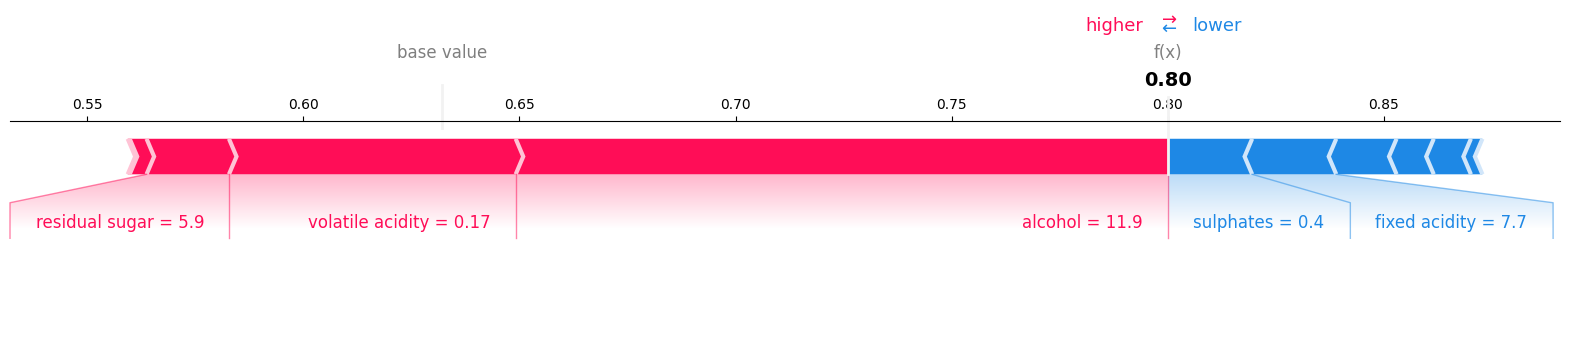

In [52]:
shap.plots.force(explainer_shap.expected_value[1], shap_plots[1][1,:], X_test.iloc[1, :], matplotlib = True)